<a href="https://colab.research.google.com/github/rollandakbar/coursera-assigment/blob/master/Challenge4_Mochammad_Rolland_Akbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Mochammad Rolland Akbar

## import data

In [133]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [134]:
import io
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [135]:
train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [137]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [138]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

#### jadi diketahui ada 3652 yang churn no sedangkan 598 yang churn yes

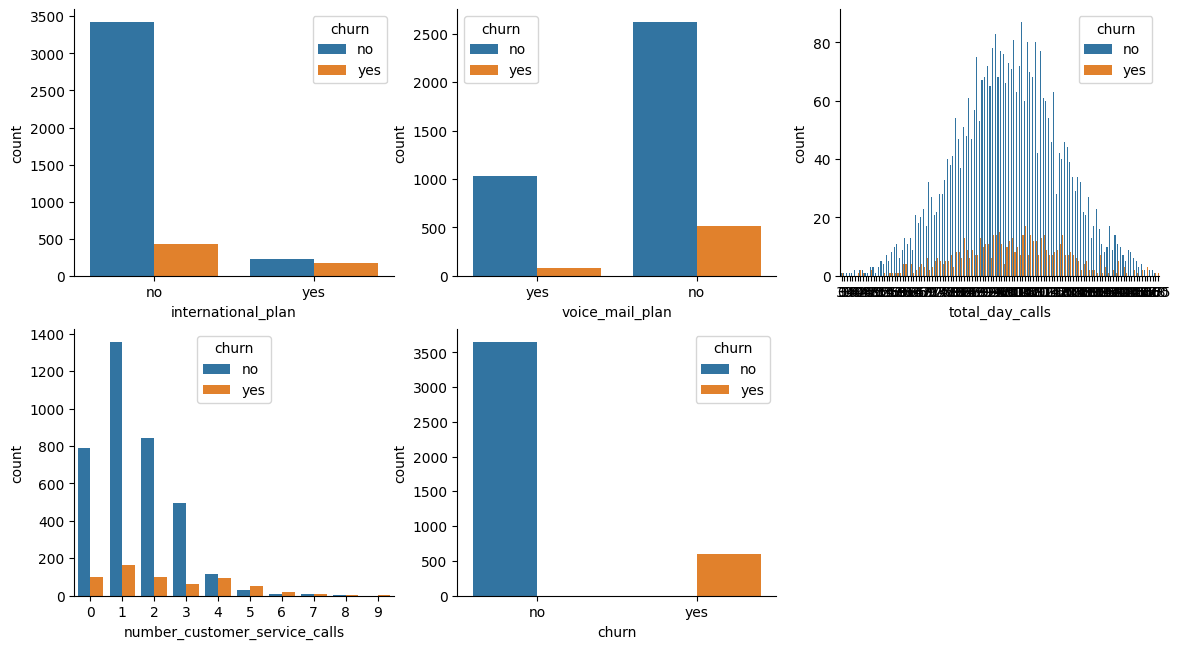

In [140]:
attributes = ['international_plan', 'voice_mail_plan', 'total_day_calls', 'number_customer_service_calls', 'churn']

# plot countplots 
plt.figure(figsize=(14, 12), dpi=100)
for i, feature in enumerate(attributes):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=train, x=feature, hue='churn')
    
sns.despine()

In [160]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train[selected_features] = scaler.fit_transform(X_train[selected_features])
# X_test[selected_features] = scaler.fit_transform(X_test[selected_features])

In [162]:
from sklearn.tree import DecisionTreeClassifier #import libary scikit learn untuk tree
from sklearn.neighbors import KNeighborsClassifier #import libary scikit learn untuk k-NN
data_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [163]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,1,0,1,0,0,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,1,0,1,0,1,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,1,0,0,0,1,1,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,1,0,0,1,1,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,0,0,0,0,0,1,1,0,0,1


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [164]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [165]:
categorical = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [ ]:
for cat in categorical:
    onehots = pd.get_dummies(train[cat], prefix=cat)
    train = train.join(onehots)


In [ ]:
train.info()

In [170]:
#Independent Variable/Features
x = train.drop(['churn', 'state', 'area_code', 'international_plan','voice_mail_plan' ],1)

#Dependent Variable/Target Label
y = train['churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
x

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)


In [154]:
selected_features = ['account_length', 'number_vmail_messages', 
                     'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 
                     'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])
data_test[selected_features] = scaler.fit_transform(data_test[selected_features])


Logistic Regression

In [183]:
# Fitting Logistic Regression to the Training set
# sangat bagus untuk kasus binomial
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [182]:
from sklearn.model_selection import cross_val_score

In [185]:
# predicting cross validation score
cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = lr.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_train)

y_pred_lr_test = lr.predict(data_test)
# accuracy_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", y_pred_lr_test)

CV:  0.8648735678937021
Training set:  0.8739495798319328
Test set:  ['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 


CONFUSION MATRIX


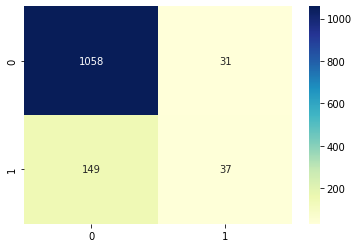

In [113]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred_lr_test)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


### Decision tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier (max_depth=10)

DecTree.fit (X_train, y_train)
y_preds = DecTree.predict(data_test)

In [130]:
# predicting cross validation score
cv_dt = cross_val_score(estimator = DecTree, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = DecTree.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_train)

y_pred_dt_test = DecTree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_test)

CV:  0.9314283777371026
Training set:  0.35428571428571426


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_code
- id
- international_plan
- state
- voice_mail_plan
Feature names seen at fit time, yet now missing:
- area_code_area_code_408
- area_code_area_code_415
- area_code_area_code_510
- international_plan_no
- international_plan_yes
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [116]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()